In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt


df = pd.read_csv("../datasets/AAPL (2021-2022).csv")
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-17,169.929993,173.470001,169.690002,171.139999,170.152466,195432700
1,2021-12-20,168.279999,170.580002,167.460007,169.750000,168.770493,107499100
2,2021-12-21,171.559998,173.199997,169.119995,172.990005,171.991791,91185900
3,2021-12-22,173.039993,175.860001,172.149994,175.639999,174.626495,92135300
4,2021-12-23,175.850006,176.850006,175.270004,176.279999,175.262817,68356600


# Exploratory data analysis

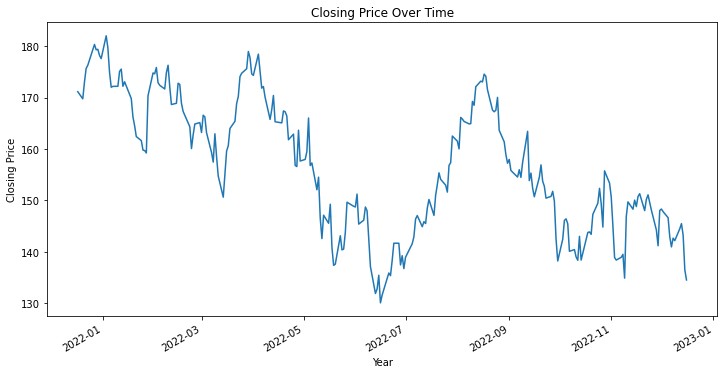

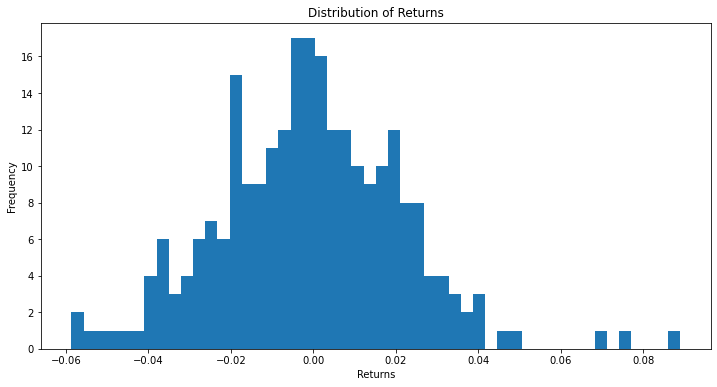

In [3]:
# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

# Plot the closing price
df['Close'].plot(figsize=(12,6))
plt.title('Closing Price Over Time')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.show()

# Plot a histogram of returns
returns = df['Close'].pct_change()
returns.plot.hist(bins=50, figsize=(12,6))
plt.title('Distribution of Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

# Technical Indicators

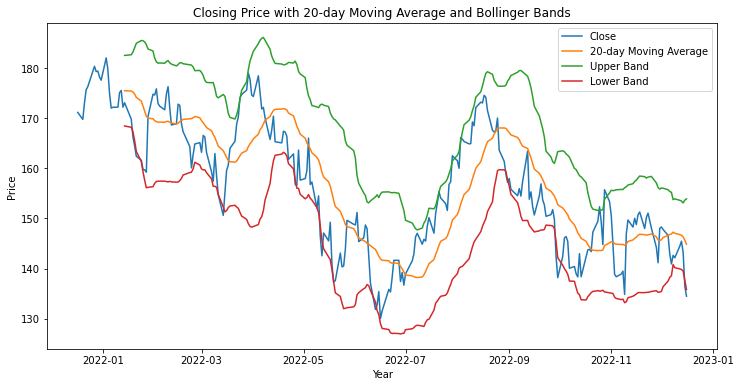

In [4]:
# Calculate the 20-day moving average
df['20d_ma'] = df['Close'].rolling(window=20).mean()

# Calculate the Bollinger Bands
df['20d_std'] = df['Close'].rolling(window=20).std()
df['upper_band'] = df['20d_ma'] + 2 * df['20d_std']
df['lower_band'] = df['20d_ma'] - 2 * df['20d_std']

# Plot the closing price with the moving average and Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close')
plt.plot(df['20d_ma'], label='20-day Moving Average')
plt.plot(df['upper_band'], label='Upper Band')
plt.plot(df['lower_band'], label='Lower Band')
plt.title('Closing Price with 20-day Moving Average and Bollinger Bands')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

# Predict

In [ ]:
%pip install tensorflow

In [3]:
# Predictive Modeling: Train machine learning models such as Random Forest and Linear Regression to predict the closing price of a stock
# then compare the performance of the models to determine which one is the best for this problem.

# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the necessary libraries for the models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# The Date column is not needed for the model
df = pd.read_csv('../datasets/AAPL (2021-2022).csv', usecols=['Open', 'High', 'Low', 'Close'])

# split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Create the features and target
X_train = train.drop(['Close'], axis=1)
y_train = train['Close']
X_test = test.drop(['Close'], axis=1)
y_test = test['Close']

# Create the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Create the Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions using the Linear Regression model
lr_pred = lr.predict(X_test)

# Make predictions using the Random Forest model
rf_pred = rf.predict(X_test)

# Calculate the RMSE for the Linear Regression model
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print('Linear Regression RMSE: {}'.format(lr_rmse))

# Calculate the RMSE for the Random Forest model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print('Random Forest RMSE: {}'.format(rf_rmse))



Linear Regression RMSE: 1.0613921228483665
Random Forest RMSE: 1.9089608741261106
